In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import os

In [68]:
url = 'https://raw.githubusercontent.com/ovlathkar/50_startups_prj3/refs/heads/main/50_Startups.csv'
data = pd.read_csv(url)
data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [69]:
data.shape

(50, 5)

In [70]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [71]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [72]:
d = {'New York':1, 'California':2, 'Florida':3}
d

{'New York': 1, 'California': 2, 'Florida': 3}

In [73]:
data['State'] = data['State'].map(d)

In [74]:
data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,1,192261.83
1,162597.7,151377.59,443898.53,2,191792.06


In [75]:
#sampling and splitting of data for training and testing
X= data.iloc[:,0:4]

In [76]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,1
1,162597.70,151377.59,443898.53,2
2,153441.51,101145.55,407934.54,3
3,144372.41,118671.85,383199.62,1
4,142107.34,91391.77,366168.42,3
5,131876.90,99814.71,362861.36,1
6,134615.46,147198.87,127716.82,2
7,130298.13,145530.06,323876.68,3
8,120542.52,148718.95,311613.29,1
9,123334.88,108679.17,304981.62,2


In [77]:
y = data.iloc[:,-1]
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [78]:
#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
X_train.shape, y_train.shape

((40, 4), (40,))

In [79]:
X_train.head(2)

,R&D Spend,Administration,Marketing Spend,State
32,63408.86,129219.61,46085.25,2
39,38558.51,82982.09,174999.30,2


In [80]:
X_test.shape, y_test.shape

((10, 4), (10,))

In [81]:
model = LinearRegression()
model_train = model.fit(X_train, y_train)
print("Model Training Completed")

Model Training Completed


In [82]:
R2score_training = model_train.score(X_train, y_train)
y_pred = model_train.predict(X_test)
R2score_testing = r2_score(y_test, y_pred)
mse = mean_squared_error (y_test, y_pred)
rsme = np.sqrt(mse)
print("======Details of R2 score, mse, and rsme======")
print("R2 score for training = ",R2score_training)
print("R2 score for testing = ", R2score_testing)
print("Mean squared error = ", mse)
print("Root mean squared error = ", rsme)

======Details of R2 score, mse, and rsme======
R2 score for training =  0.94241695814021
R2 score for testing =  0.9650991796290038
Mean squared error =  79183761.07501462
Root mean squared error =  8898.525780993985


In [83]:
pred_table = ({'Actual Profit':y_test,'Predicted Profit':y_pred})
print("Table showing Actual Profit and Predicted Profit")
print(pd.DataFrame(pred_table))


Table showing Actual Profit and Predicted Profit
    Actual Profit  Predicted Profit
27      105008.31     114482.687302
35       96479.51      90333.786629
40       78239.91      75908.971166
38       81229.06      69927.802332
2       191050.39     179699.825862
3       182901.99     171430.458353
48       35673.41      49405.402802
29      101004.64     102074.076389
46       49490.75      58472.566322
31       97483.56      98063.628483


plot for actual and predicted profit


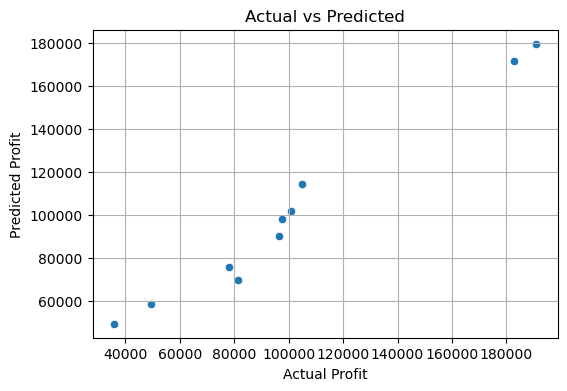

In [84]:
print("plot for actual and predicted profit")
plt.figure(figsize = (6,4))
sns.scatterplot (x=y_test, y=y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [85]:
print("----------Correlation Matrix----------")
correlation = data.corr()
print(correlation)

----------Correlation Matrix----------
                 R&D Spend  Administration  Marketing Spend     State  \
R&D Spend         1.000000        0.241955         0.724248  0.037930   
Administration    0.241955        1.000000        -0.032154  0.003026   
Marketing Spend   0.724248       -0.032154         1.000000  0.137777   
State             0.037930        0.003026         0.137777  1.000000   
Profit            0.972900        0.200717         0.747766  0.048471   

                   Profit  
R&D Spend        0.972900  
Administration   0.200717  
Marketing Spend  0.747766  
State            0.048471  
Profit           1.000000  


---------Correlation Heatmap----------


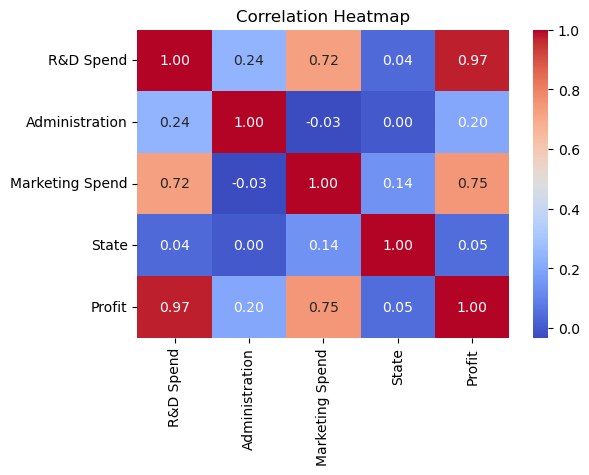

In [86]:
print("---------Correlation Heatmap----------")
plt.figure(figsize = (6,4))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title ("Correlation Heatmap")
plt.show()

----------Residual Plot----------


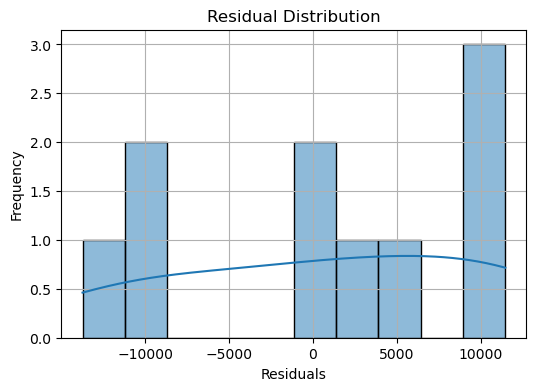

In [87]:
print("----------Residual Plot----------")
residuals = y_test - y_pred
plt.figure(figsize = (6,4))
sns.histplot(residuals, bins = 10, kde = True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

----------Regression Plot for R&D spend and Profit----------


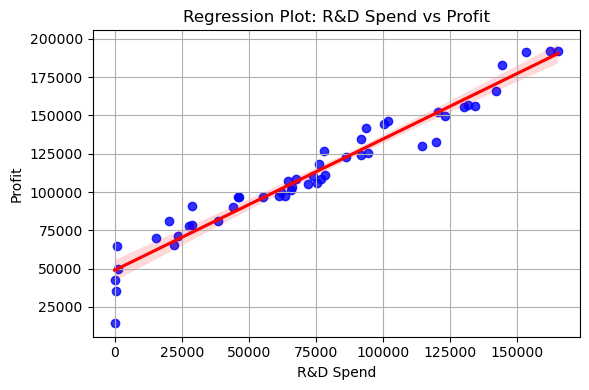

In [88]:
print("----------Regression Plot for R&D spend and Profit----------")
plt.figure(figsize=(6,4))
sns.regplot(x='R&D Spend', y = 'Profit', data = data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot: R&D Spend vs Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

----------Regression Plot for Marketing spend and Profit----------


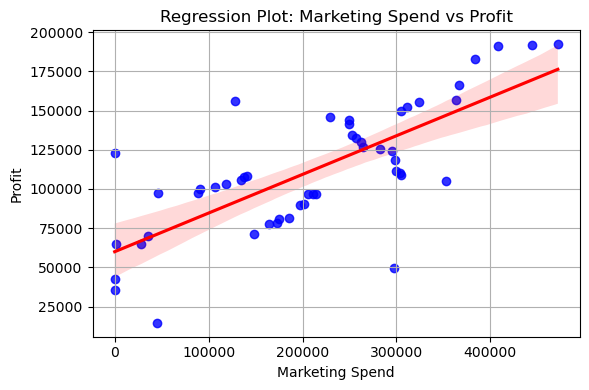

In [89]:
print("----------Regression Plot for Marketing spend and Profit----------")
plt.figure(figsize=(6,4))
sns.regplot(x='Marketing Spend', y = 'Profit', data = data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot: Marketing Spend vs Profit")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

----------Regression Plot for Administration spend and Profit----------


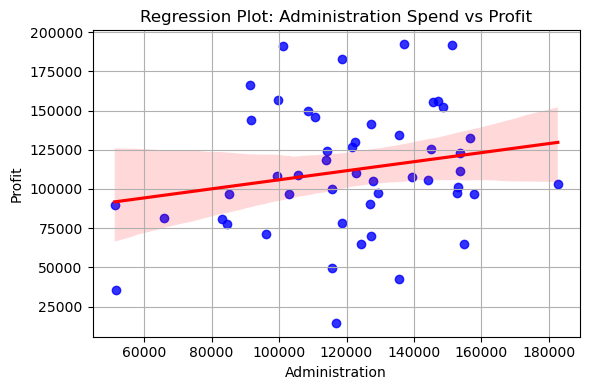

In [90]:
print("----------Regression Plot for Administration spend and Profit----------")
plt.figure(figsize=(6,4))
sns.regplot(x='Administration', y = 'Profit', data = data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot: Administration Spend vs Profit")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()